In [1]:
from nitropulse import RegressionRF

In [2]:
import pandas as pd

In [3]:
# Load df from CSV
inv_df = pd.read_csv("/home/morteza/.nitropulse/outputs/inv_df.csv", parse_dates=['date'])

print(inv_df.shape)
inv_df.head()

(5051, 41)


,index,date,op,VH,VV,angle,lc,Station,station,depth,...,c,w,vvv,vvs,s,l,rvi,height,k,b
0,0,2015-03-28 00:56:57,0,-21.0,-11.0,41.0,110,SK3,SK3,0 to 5 cm,...,0.091748,0.094531,-13.991384,-14.029299,0.038240,0.083454,0.363636,0.002909,0.80,0.0
1,0,2015-03-28 00:56:57,0,-15.0,-11.0,41.0,110,SK4,SK4,0 to 5 cm,...,0.100000,0.100000,-14.047640,-13.973278,0.038606,0.074577,1.138989,0.009112,0.80,0.0
2,0,2015-03-28 00:56:57,0,-17.0,-11.0,41.0,122,SK2,SK2,0 to 5 cm,...,0.100000,0.100000,-14.060940,-13.960243,0.040100,0.074518,0.803040,0.008030,1.00,0.0
3,0,2015-03-28 00:56:57,0,-18.0,-11.0,41.0,122,SK1,SK1,0 to 5 cm,...,0.091390,0.104585,-13.958707,-14.062513,0.044286,0.081773,0.665350,0.006654,1.00,0.0
4,0,2015-04-25 00:23:20,0,-20.0,-11.0,40.0,158,MB7,MB7,0 to 5 cm,...,0.094532,0.111709,-14.053754,-13.967277,0.040103,0.081387,0.447263,0.004249,0.95,0.0


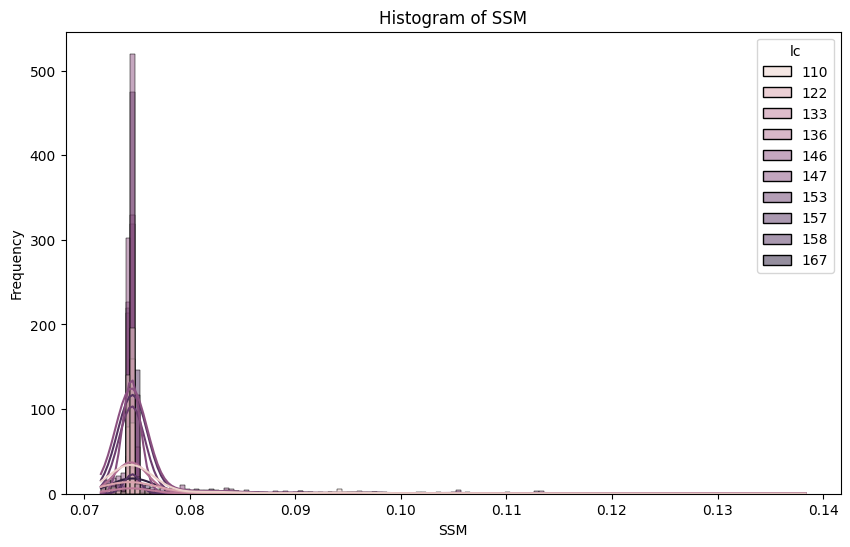

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(inv_df, x='l', kde=True, hue='lc')
plt.title('Histogram of SSM')
plt.xlabel('SSM')
plt.ylabel('Frequency')
plt.show()

In [21]:
ensrf = RegressionRF(workspace_dir='/home/morteza/.nitropulse', df=inv_df)
rf_models = ensrf.run(vars=['vvs', 's', 'l', 'ssm'], holdout_by_year=True)

Holdout years (per station): MB10:2021, MB11:2020, MB12:2018, MB13:2018, MB14:2021, MB15:2016, MB17:2023, MB18:2020, MB19:2020, MB1:2015, MB21:2023, MB22:2023, MB23:2023, MB24:2023, MB25:2023, MB26:2022, MB2:2019, MB3:2016, MB4:2022, MB5:2019, MB6:2019, MB7:2018, MB8:2016, MB9:2023, SK1:2022, SK2:2020, SK3:2018, SK4:2022


Training ensemble models:   0%|          | 0/4 [00:00<?, ?it/s]

Training model for 'vvs' using features: ['vh', 'vv', 'angle', 'rvi', 'year', 'doy', 'lc', 'op']
Metrics for vvs:
	R2: 0.9918
	MAE: 0.1685
	MSE: 0.0765
	RMSE: 0.2765
	UBRMSE: 0.2765
	Bias: -0.0054

Training model for 's' using features: ['vh', 'vv', 'angle', 'rvi', 'year', 'doy', 'lc', 'op']
Metrics for s:
	R2: 0.9054
	MAE: 0.0016
	MSE: 0.0000
	RMSE: 0.0022
	UBRMSE: 0.0022
	Bias: 0.0001

Training model for 'l' using features: ['vh', 'vv', 'angle', 'rvi', 'year', 'doy', 'lc', 'op']
Metrics for l:
	R2: 0.5177
	MAE: 0.0015
	MSE: 0.0000
	RMSE: 0.0039
	UBRMSE: 0.0039
	Bias: -0.0003

Training model for 'ssm' using features: ['angle', 'vvs', 's', 'l', 'year', 'doy', 'lc', 'op']
Metrics for ssm:
	R2: 0.5749
	MAE: 0.0494
	MSE: 0.0039
	RMSE: 0.0622
	UBRMSE: 0.0601
	Bias: -0.0160



In [22]:
test_df = rf_models['ssm']['test_df']
test_df.head()

,index,date,op,vh,vv,angle,lc,station,depth,mean_sst,...,w,vvv,vvs,s,l,rvi,height,k,b,ssm_pred
0,2,2015-05-19 00:23:22,0,-17.0,-10.0,40.0,146,MB1,0 to 5 cm,9.991667,...,0.099634,-12.962031,-13.059112,0.036325,0.074542,0.665350,0.005988,0.90000,0.000,0.286442
1,3,2015-05-26 00:15:28,0,-18.0,-12.0,31.0,146,MB1,0 to 5 cm,21.833333,...,0.099996,-14.930991,-15.091084,0.033687,0.074750,0.803040,0.147372,1.98900,13.140,0.207723
2,4,2015-06-07 00:15:29,0,-16.0,-9.0,31.0,146,MB1,0 to 5 cm,20.166667,...,0.099998,-11.943191,-12.078462,0.029397,0.074883,0.665350,0.287648,1.70550,27.630,0.266683
3,5,2015-06-19 00:15:30,0,-18.0,-13.0,31.0,146,MB1,0 to 5 cm,20.258333,...,0.099981,-15.579956,-16.488025,0.035867,0.074675,0.961012,0.410695,1.43550,39.690,0.143797
4,6,2015-06-24 00:23:23,0,-18.0,-12.0,40.0,146,MB1,0 to 5 cm,22.225000,...,0.099972,-14.650099,-15.403100,0.040959,0.074483,0.803040,0.555513,1.09125,54.675,0.272355


In [23]:
# group by station and year to get counts for each station-year
station_year_counts = test_df.groupby(['station', 'year', 'lc']).size().unstack(fill_value=0).sort_index()
station_year_counts

,lc,110,122,133,136,146,147,153,158,167
station,year,,,,,,,,,
MB1,2015,0,0,0,0,13,0,0,0,0
MB10,2021,0,0,20,0,0,0,0,0,0
MB11,2020,0,0,0,0,39,0,0,0,0
MB12,2018,0,0,26,0,0,0,0,0,0
MB13,2018,0,0,0,0,0,0,0,19,0
MB14,2021,0,0,0,0,12,0,0,0,0
MB15,2016,0,0,0,0,0,0,0,0,17
MB17,2023,0,0,0,0,0,0,35,0,0
MB18,2020,0,0,0,0,0,0,10,0,0


In [24]:
import pandas as pd

risma_df = pd.read_csv('~/.nitropulse/outputs/risma_df.csv')
risma_df.head()

,date,station,depth,mean_sst,mean_airt,airt,prcp,ssm,sst,year,doy,depth_cm,bulk,sand,silt,clay,classification
0,2013-04-16 18:00:00,MB1,0 to 5 cm,0.108333,-1.52,-1.82,0.0,-0.160000,0.000000,2013,106,5,1.28,0.788,0.101,0.111,Sandy Loam
1,2013-04-16 18:15:00,MB1,0 to 5 cm,0.108333,-1.52,-2.02,0.0,0.206667,0.050000,2013,106,5,1.28,0.788,0.101,0.111,Sandy Loam
2,2013-04-16 18:30:00,MB1,0 to 5 cm,0.108333,-1.52,-1.89,0.0,0.206667,0.050000,2013,106,5,1.28,0.788,0.101,0.111,Sandy Loam
3,2013-04-16 18:45:00,MB1,0 to 5 cm,0.108333,-1.52,-1.67,0.0,0.208333,0.083333,2013,106,5,1.28,0.788,0.101,0.111,Sandy Loam
4,2013-04-16 19:00:00,MB1,0 to 5 cm,0.108333,-1.52,-1.72,0.0,0.208333,0.083333,2013,106,5,1.28,0.788,0.101,0.111,Sandy Loam


In [25]:
# filter data for a specific station and year
year = 2023
station_id = 'MB24'

# count records for station MB15 (matches MB15, MB_15 or MB-15) in year 2015
mask_station = risma_df['station'].astype(str).str.contains(station_id, case=False, na=False)
mask_year = risma_df['year'] == year
sub_df = risma_df.loc[mask_station & mask_year]
print(sub_df.shape)
sub_df.head()

(35036, 17)


,date,station,depth,mean_sst,mean_airt,airt,prcp,ssm,sst,year,doy,depth_cm,bulk,sand,silt,clay,classification
6597053,2023-01-01 00:00:00,MB24,0 to 5 cm,-1.616667,-9.615,-8.90,0.0,0.126667,-1.733333,2023,1,5,1.4,0.81,0.12,0.07,Loamy Sand
6597080,2023-01-01 00:15:00,MB24,0 to 5 cm,-1.616667,-9.615,-8.90,0.0,0.126667,-1.733333,2023,1,5,1.4,0.81,0.12,0.07,Loamy Sand
6597099,2023-01-01 00:30:00,MB24,0 to 5 cm,-1.616667,-9.615,-8.92,0.0,0.126667,-1.733333,2023,1,5,1.4,0.81,0.12,0.07,Loamy Sand
6597118,2023-01-01 00:45:00,MB24,0 to 5 cm,-1.616667,-9.615,-8.97,0.0,0.126667,-1.733333,2023,1,5,1.4,0.81,0.12,0.07,Loamy Sand
6597137,2023-01-01 01:00:00,MB24,0 to 5 cm,-1.616667,-9.615,-8.99,0.0,0.126667,-1.733333,2023,1,5,1.4,0.81,0.12,0.07,Loamy Sand


In [26]:
# prepare prediction table
df_pred = test_df[['date', 'station', 'lc', 'ssm_pred']].copy()
df_pred['date'] = pd.to_datetime(df_pred['date'])
df_pred = df_pred.sort_values(['station', 'date', 'lc']).reset_index(drop=True)
print(df_pred.shape)
df_pred.head()

(795, 4)


,date,station,lc,ssm_pred
0,2015-05-19 00:23:22,MB1,146,0.286442
1,2015-05-26 00:15:28,MB1,146,0.207723
2,2015-06-07 00:15:29,MB1,146,0.266683
3,2015-06-19 00:15:30,MB1,146,0.143797
4,2015-06-24 00:23:23,MB1,146,0.272355


In [27]:
import pandas as pd

def asof_merge_predictions(sub_df, df_pred, tol="30min"):
    # keep only what we need from predictions (includes 'lc')
    right = df_pred.loc[:, ["date", "station", "ssm_pred", "lc"]].copy()
    left  = sub_df.copy()

    # normalize dtypes
    for d in (left, right):
        d["date"] = pd.to_datetime(d["date"], errors="coerce")
        d.dropna(subset=["date", "station"], inplace=True)
        d["station"] = d["station"].astype(str)
        # ensure tz-naive
        try:
            d["date"] = d["date"].dt.tz_localize(None)
        except (TypeError, AttributeError):
            pass

    tol = pd.Timedelta(tol)

    # merge per station (avoids global 'by' sorting pitfalls)
    out = []
    for st, l_g in left.groupby("station", sort=False):
        r_g = right[right["station"] == st]
        if r_g.empty:
            out.append(l_g)  # nothing to merge for this station
            continue
        l_g = l_g.sort_values("date")
        r_g = r_g.sort_values("date")
        out.append(pd.merge_asof(
            l_g, r_g,
            on="date",
            direction="nearest",
            tolerance=tol,
            suffixes=("", "_pred")
        ))
    merged = pd.concat(out, ignore_index=True)

    matched = merged["ssm_pred"].notna().sum() if "ssm_pred" in merged.columns else 0
    print(f"Rows: {len(merged)}; matched within {tol}: {matched}")
    return merged

# usage
sub_df = asof_merge_predictions(sub_df, df_pred, tol="30min")
sub_df.head()


Rows: 35036; matched within 0 days 00:30:00: 184


,date,station,depth,mean_sst,mean_airt,airt,prcp,ssm,sst,year,doy,depth_cm,bulk,sand,silt,clay,classification,station_pred,ssm_pred,lc
0,2023-01-01 00:00:00,MB24,0 to 5 cm,-1.616667,-9.615,-8.90,0.0,0.126667,-1.733333,2023,1,5,1.4,0.81,0.12,0.07,Loamy Sand,NaN,NaN,NaN
1,2023-01-01 00:15:00,MB24,0 to 5 cm,-1.616667,-9.615,-8.90,0.0,0.126667,-1.733333,2023,1,5,1.4,0.81,0.12,0.07,Loamy Sand,NaN,NaN,NaN
2,2023-01-01 00:30:00,MB24,0 to 5 cm,-1.616667,-9.615,-8.92,0.0,0.126667,-1.733333,2023,1,5,1.4,0.81,0.12,0.07,Loamy Sand,NaN,NaN,NaN
3,2023-01-01 00:45:00,MB24,0 to 5 cm,-1.616667,-9.615,-8.97,0.0,0.126667,-1.733333,2023,1,5,1.4,0.81,0.12,0.07,Loamy Sand,NaN,NaN,NaN
4,2023-01-01 01:00:00,MB24,0 to 5 cm,-1.616667,-9.615,-8.99,0.0,0.126667,-1.733333,2023,1,5,1.4,0.81,0.12,0.07,Loamy Sand,NaN,NaN,NaN


In [28]:
lc = int(sub_df.lc.unique().tolist()[1])
lc

146

In [29]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import pearsonr

# ---- Prep ----
df = sub_df.loc[:, ["ssm", "ssm_pred", "station", "date"]].dropna(subset=["ssm", "ssm_pred"]).copy()
obs  = df["ssm"].to_numpy()
pred = df["ssm_pred"].to_numpy()
n = obs.size

# Metrics
bias   = float(np.mean(pred - obs))
rmse   = float(np.sqrt(np.mean((pred - obs) ** 2)))
ub_rmse= float(np.sqrt(np.mean(((pred - obs) - bias) ** 2)))
r, _   = pearsonr(obs, pred)

# Axis limits (square)
minv = float(min(obs.min(), pred.min()))
maxv = float(max(obs.max(), pred.max()))
pad  = 0.02 * (maxv - minv) if maxv > minv else 0.01
xmin, xmax = minv - pad, maxv + pad
x_line = np.linspace(xmin, xmax, 200)

# Regression (y on x)
m, b = np.polyfit(obs, pred, 1)
y_reg = m * x_line + b

# ---- Figure ----
fig = go.Figure()

# 1:1 line
fig.add_trace(go.Scatter(
    x=x_line, y=x_line, mode="lines",
    line=dict(color="rgba(0,0,0,0.6)", width=2, dash="dash"),
    name="1:1", hoverinfo="skip"
))

# Regression line
fig.add_trace(go.Scatter(
    x=x_line, y=y_reg, mode="lines",
    line=dict(color="rgb(0,90,200)", width=3),
    name=f"Regression (y = {m:.3f}x + {b:.3f})",
    hoverinfo="skip"
))

# Scatter points (bigger dots)
fig.add_trace(go.Scatter(
    x=obs, y=pred, mode="markers",
    marker=dict(size=9, color="rgba(0,0,0,0.65)"),
    name="Predicted vs Observed",
    customdata=np.stack([
        df["station"].to_numpy(),
        df["date"].astype(str).to_numpy(),
        (pred - obs)
    ], axis=1),
    hovertemplate=(
        "Station: %{customdata[0]}<br>"
        "Date: %{customdata[1]}<br>"
        "Obs: %{x:.3f}<br>"
        "Pred: %{y:.3f}<br>"
        "Residual: %{customdata[2]:+.3f}<extra></extra>"
    )
))

# Metrics box
metrics_text = (
    f"n = {n:,}<br>"
    f"r = {r:.3f}<br>"
    f"RMSE = {rmse:.4f}<br>"
    f"ubRMSE = {ub_rmse:.4f}<br>"
    f"Bias = {bias:+.4f}"
)
fig.add_annotation(
    x=0.02, y=0.98, xref="paper", yref="paper",
    text=metrics_text, showarrow=False, align="left",
    bordercolor="rgba(0,0,0,0.4)", borderwidth=1,
    bgcolor="rgba(255,255,255,0.95)", font=dict(size=14)
)

# Layout with stronger axis fonts
fig.update_layout(
    template="plotly_white",
    title=f"Station: {station_id}, Crop: {lc}, Year: {year}",
    xaxis_title="Observed SSM (m³/m³)",
    yaxis_title="Predicted SSM (m³/m³)",
    width=900, height=700,
    font=dict(family="Arial", size=14),
    legend=dict(orientation="h", yanchor="bottom", y=1.02,
                xanchor="right", x=1),
    margin=dict(l=80, r=20, t=60, b=70)
)

# Axis styling: stronger ticks + titles
fig.update_xaxes(
    range=[xmin, xmax],
    tickformat=".2f",
    showgrid=True,
    zeroline=False,
    title_font=dict(size=18),
    tickfont=dict(size=14)
)
fig.update_yaxes(
    range=[xmin, xmax],
    tickformat=".2f",
    showgrid=True,
    zeroline=False,
    scaleanchor="x", scaleratio=1,
    title_font=dict(size=18),
    tickfont=dict(size=14)
)

fig.show()


In [30]:
# aggregate to daily (sum precipitation, mean SSM) so they can be plotted together
sub_df_day = sub_df.copy()
sub_df_day["date"] = pd.to_datetime(sub_df_day["date"]).dt.floor("D")

precip_daily = (
    sub_df_day.groupby("date", as_index=False)["prcp"]
    .sum()
    .rename(columns={"prcp": "prcp_daily"})
)
sst_daily = (
    sub_df_day.groupby("date", as_index=False)["sst"]
    .mean()
    .rename(columns={"sst": "sst_daily"})
)

airt_daily = (
    sub_df_day.groupby("date", as_index=False)["airt"]
    .mean()
    .rename(columns={"airt": "airt_daily"})
)

# Make temp column with less missing cell values
temp_daily = pd.merge(sst_daily, airt_daily, on="date", how="outer").sort_values("date").reset_index(drop=True)
temp_daily["temp_daily"] = temp_daily[["sst_daily", "airt_daily"]].mean(axis=1)
temp_daily = temp_daily[["date", "temp_daily"]] 

# merged table for easy plotting/inspection
daily = pd.merge(temp_daily, precip_daily, on="date", how="outer").sort_values("date").reset_index(drop=True)
daily["prcp_daily"] = daily["prcp_daily"].fillna(0)
daily["station"] = station_id

daily.head()

,date,temp_daily,prcp_daily,station
0,2023-01-01,-5.452691,0.0,MB24
1,2023-01-02,-8.051094,0.0,MB24
2,2023-01-03,-9.011910,0.0,MB24
3,2023-01-04,-9.135156,0.0,MB24
4,2023-01-05,-9.355122,0.0,MB24


In [31]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Prep dates ---
sub_df = sub_df.copy()
daily = daily.copy()
temp_daily = temp_daily.copy()

sub_df["date"]    = pd.to_datetime(sub_df["date"]).dt.floor("D")
daily["date"]     = pd.to_datetime(daily["date"]).dt.floor("D")
temp_daily["date"] = pd.to_datetime(temp_daily["date"]).dt.floor("D")

# --- Find contiguous frozen ranges (sst ≤ 0 °C) ---
temp_daily["is_frozen"] = temp_daily["temp_daily"] <= 0
grp = (temp_daily["is_frozen"] != temp_daily["is_frozen"].shift()).cumsum()
frozen_ranges = (
    temp_daily.loc[temp_daily["is_frozen"]]
    .groupby(grp)
    .agg(start=("date", "min"), end=("date", "max"))
    .reset_index(drop=True)
)

# --- Build figure with secondary y-axis ---
fig = make_subplots(specs=[[{"secondary_y": True}]])

# 1) Frozen shading (background)
for _, r in frozen_ranges.iterrows():
    fig.add_shape(
        type="rect", xref="x", yref="paper",
        x0=r["start"], x1=r["end"], y0=0, y1=1,
        fillcolor="LightSkyBlue", opacity=0.25,
        layer="below", line_width=0
    )

# 2) Soil moisture lines
for st, df_st in sub_df.sort_values("date").groupby("station"):
    fig.add_trace(
        go.Scatter(
            x=df_st["date"], y=df_st["ssm"],
            name=st, mode="lines", line=dict(width=2),
            connectgaps=False
        ),
        secondary_y=False
    )

# 3) Precipitation bars
one_day_ms = 24 * 60 * 60 * 1000
fig.add_trace(
    go.Bar(
        x=daily["date"], y=daily["prcp_daily"],
        name="Precipitation", marker_color="red",
        opacity=0.6, marker_line=dict(width=0),
        width=0.9 * one_day_ms
    ),
    secondary_y=True
)

# 4) Predicted soil moisture points
fig.add_trace(
    go.Scatter(
        x=sub_df['date'],
        y=sub_df['ssm_pred'],
        mode='markers',
        name=f'S1 (crop={lc})',
        marker=dict(size=7, color='black', symbol='circle'),
        hovertemplate='Station: %{customdata[0]}<br>Date: %{x|%Y-%m-%d}<br>ssm_pred: %{y:.3f}',
        customdata=df_pred[['station']].values
    ),
    secondary_y=False
)

# Layout & axes with bigger fonts
fig.update_layout(
    showlegend=True,
    legend_title_text="Stations",
    font=dict(family="Arial", size=14, color="Black"),  # base font
    bargap=0,
    barmode="overlay",
    annotations=[dict(
        xref="paper", x=0.01, y=0.4, xanchor="left", yanchor="top",
        text="Shaded = frozen soil (sst ≤ 0 °C)",
        showarrow=False, bgcolor="rgba(255,255,255,0.7)",
        bordercolor="LightSkyBlue",
        font=dict(size=14)
    )],
    width=1500,
    height=500,
)

fig.update_xaxes(
    title_text="Date",
    title_font=dict(size=18),
    tickfont=dict(size=14)
)
fig.update_yaxes(
    title_text="Soil Moisture (m³/m³)",
    secondary_y=False,
    title_font=dict(size=18),
    tickfont=dict(size=14)
)
fig.update_yaxes(
    title_text="Precipitation (mm/day)",
    secondary_y=True,
    title_font=dict(size=18),
    tickfont=dict(size=14)
)

fig.show()


In [32]:
# gee_project_id = 'ee-mortezakhazaei1370'
# RT_models = {'RT_s': 'AIEM', 'RT_c': 'Diff'}
# ensrf.upload_rf_to_gee(rf_models, gee_project_id, rt_models=RT_models)